# ML Project 9 

+ age: Hastanın yaşı.
+ sex: Hastanın cinsiyeti (1 = erkek, 0 = kadın).
+ cp (chest pain type): Göğüs ağrısı tipi (0, 1, 2, 3 olmak üzere dört farklı kategori):
  + 0: Tipik angina
  + 1: Atipik angina
  + 2: Non-anginal ağrı
  + 3: Asemptomatik
+ trestbps (resting blood pressure): Dinlenme halindeki kan basıncı (mm Hg cinsinden).
+ chol (serum cholestoral): Serum kolestrol düzeyi (mg/dl cinsinden).
+ fbs (fasting blood sugar): Açlık kan şekeri > 120 mg/dl (1 = doğru, 0 = yanlış).
+ restecg (resting electrocardiographic results): Dinlenme halindeki elektrokardiyografi sonuçları (0, 1, 2 olmak üzere üç farklı kategori):
    + 0: Normal
    + 1: ST-T dalga anormallikleri (T dalgası inversiyonu ve/veya ST yükselmesi veya depresyonu)
    + 2: Sol ventrikül hipertrofisi
+ thalach (maximum heart rate achieved): Maksimum kalp atış hızı.
+ exang (exercise induced angina): Egzersizle indüklenen angina (1 = evet, 0 = hayır).
+ oldpeak: Egzersizle indüklenen ST depresyonu.
+ slope: Egzersiz sırasında ST segmentinin eğimi (0, 1, 2 olmak üzere üç farklı kategori):
    + 0: Yukarı eğimli
    + 1: Düz
    + 2: Aşağı eğimli
+ ca: Floroskopi sonucu tespit edilen majör damarların (0-3 arasında değişen) sayısı.
+ thal: Talasemi durumu (1 = normal, 2 = sabit defekt, 3 = tersinir defekt).
+ target: Hedef değişkeni (kalp hastalığı varlığı: 1 = var, 0 = yok).

`Özetle:`

+ Ordinal sütunlar: slope, ca, thal
+ Nominal sütunlar: sex, cp, fbs, restecg, exang

## Importing Libraries and Data 

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#Model fonksiyonları, modeli kurarken 
#Değerlendirme fonksiyonları, modeli değerlendirirken 

In [3]:
project_9 = pd.read_csv("heart_disease_data.csv")

In [4]:
project_9

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Analysing Data

In [5]:
project_9.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### .info()

In [6]:
project_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### .shape

In [7]:
project_9.shape

(303, 14)

### .columns

In [8]:
project_9.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### .value_counts()

In [9]:
project_9["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### .describe()

In [10]:
project_9.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### .isnull().sum()

In [11]:
project_9.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### .duplicate() and .drop_duplicates()

In [12]:
project_9.duplicated().sum()

np.int64(1)

In [13]:
project_9[project_9.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
project_9 = project_9.drop_duplicates()

### .corr() and heatmap

<Axes: >

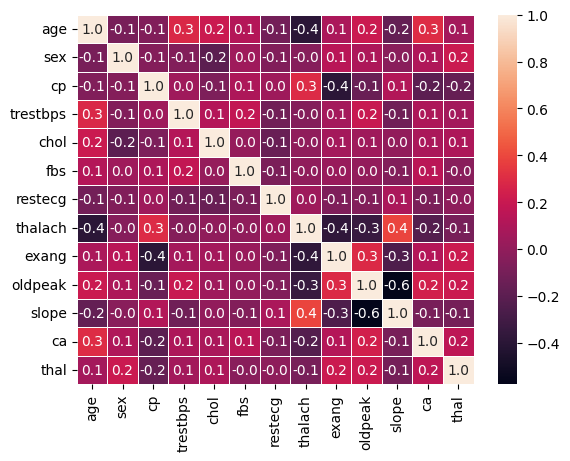

In [15]:
cor = project_9.drop(columns = "target", axis = 1).corr()
sns.heatmap(cor, annot = True, linewidths=.5, fmt= '.1f')

### .groupby()

In [16]:
project_9.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


## Data Visualization (EDA)

### Dağılım Grafiği

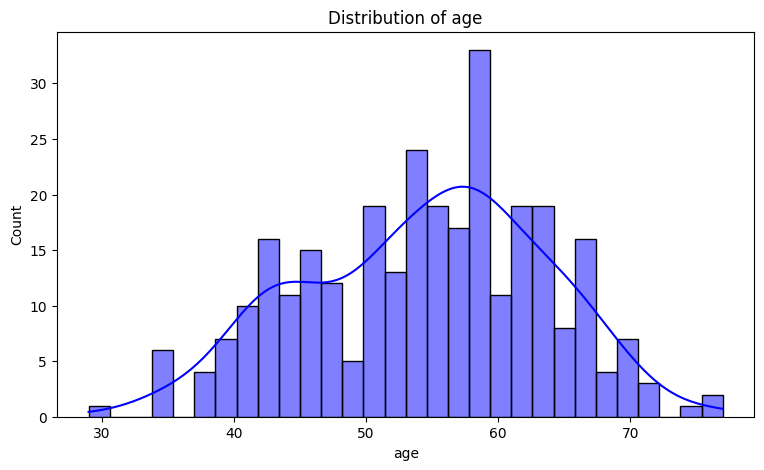

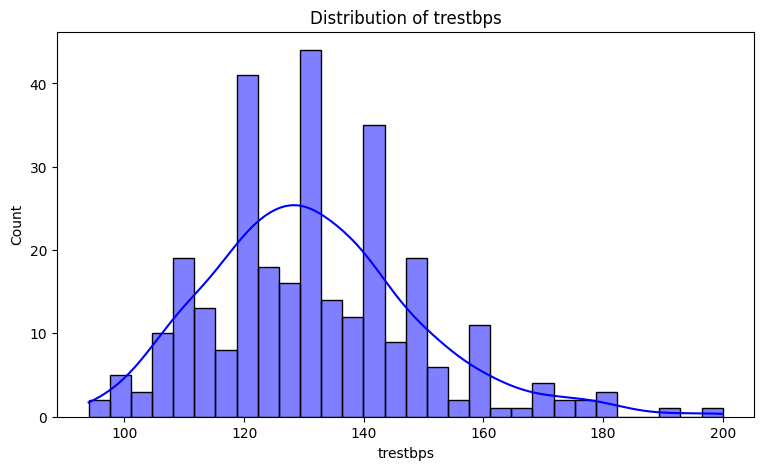

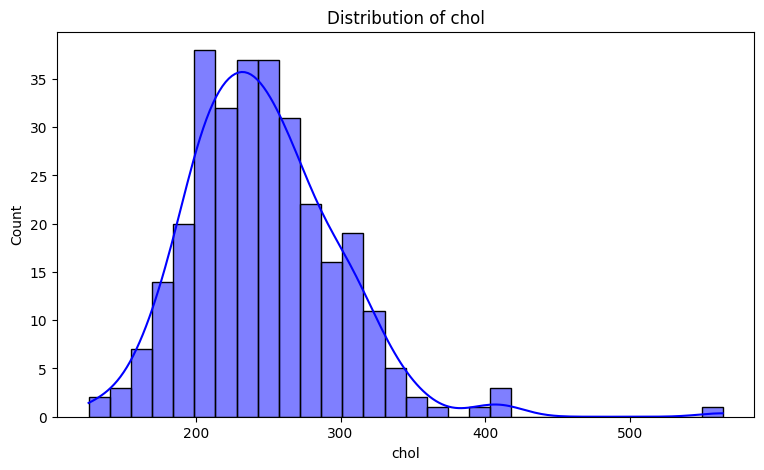

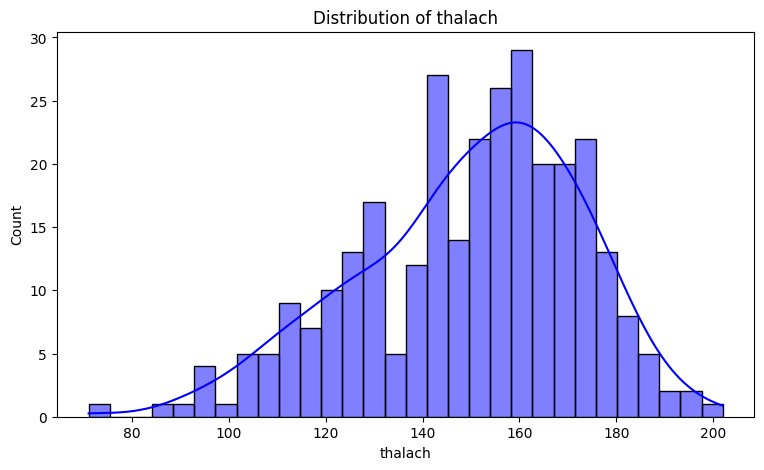

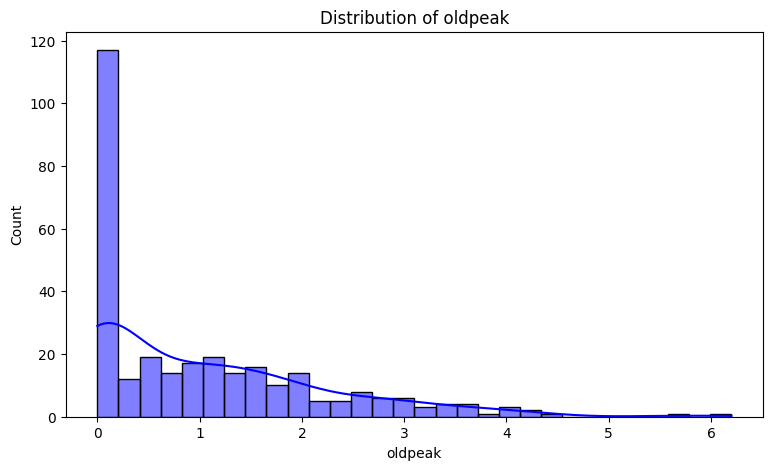

In [17]:
for column in project_9.drop(columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"], axis = 1):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_9, x=column, kde=True, bins=30, color = "blue")
    plt.title(f'Distribution of {column}')
    plt.show()

## OneHotEncoder 

In [18]:
unrelated_columns = project_9[["sex", "cp", "fbs", "restecg", "exang"]]

In [19]:
one_hot_encoder = OneHotEncoder()
encoded_unrelated = one_hot_encoder.fit_transform(unrelated_columns).toarray()
encoded_unrelated = pd.DataFrame(encoded_unrelated)
encoded_unrelated

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
298,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
300,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
project_9_encoded = project_9.drop(columns = unrelated_columns, axis = 1)
project_9_encoded = pd.concat([project_9_encoded.reset_index(drop=True), encoded_unrelated.reset_index(drop=True)], axis=1)
project_9_encoded

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,target,0,...,3,4,5,6,7,8,9,10,11,12
0,63,145,233,150,2.3,0,0,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,37,130,250,187,3.5,0,0,2,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,41,130,204,172,1.4,2,0,2,1,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56,120,236,178,0.8,2,0,2,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,57,120,354,163,0.6,2,0,2,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0.2,1,0,3,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
298,45,110,264,132,1.2,1,0,3,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
299,68,144,193,141,3.4,1,2,3,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
300,57,130,131,115,1.2,1,1,3,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
project_9_encoded.columns = project_9_encoded.columns.astype(str)

## Separating Data 

In [22]:
X = project_9_encoded.drop(columns = "target", axis = 1)
y = project_9_encoded["target"]

In [23]:
X

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,0,1,...,3,4,5,6,7,8,9,10,11,12
0,63,145,233,150,2.3,0,0,1,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,37,130,250,187,3.5,0,0,2,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,41,130,204,172,1.4,2,0,2,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56,120,236,178,0.8,2,0,2,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,57,120,354,163,0.6,2,0,2,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0.2,1,0,3,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
298,45,110,264,132,1.2,1,0,3,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
299,68,144,193,141,3.4,1,2,3,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
300,57,130,131,115,1.2,1,1,3,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: target, Length: 302, dtype: int64

## Splitting Data 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(302, 21) (271, 21) (31, 21)


In [27]:
print(y.shape, y_train.shape, y_test.shape)

(302,) (271,) (31,)


## Feature Scaling with `StandardScaler`

+ OneHotEncoder işlemini yaptıktan ve veri setini train_test_split ile ayırdıktan sonra normalizasyon işlemini yapmamız gereken 5 adet sütun vardı. Burada direkt olarak X_train üzerinden bir normalizasyon yapsaydık, OneHotEncoder ile işlenen sütunlar da normalizasyona uğrayacaktı ve veri seti hatalı olacaktı. Bu yüzden `continuous_cols` adında, sadece normalizasyon yapacağımız sütunların isimlerini içeren bir liste oluşturup X_train veri seti üzerinde `fit_transform` ile `scaler = StandardScaler()`'ı hem eğitip hem de transform işlemini gerçekleştirdik. X_test veri seti üzerinde ise, veri sızıntısı olmaması için `transform()` ile sadece transform işlemini gerçekleştirdik. Böylece OneHotEncoder ile işlediğimiz sütunlar ve Ordinal sütunlar herhangi bir bozuntuya uğramadan, numerik sütunlarımızı normalize etmiş olduk. 

In [28]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

In [29]:
# Eğitim verisinde fit ve transform işlemi
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

# Test verisinde sadece transform işlemi (Veri sızıntısını önlemek için Test veri seti üzerinde eğitim yapmıyoruz!!)
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [30]:
X_train.head(3)

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,0,1,...,3,4,5,6,7,8,9,10,11,12
283,0.733985,0.507229,-0.747828,-0.537311,0.737328,2,1,3,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
198,1.176006,-1.218921,0.041787,0.359586,-0.386204,2,2,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
42,-1.034103,-1.564151,-0.728569,-0.088862,1.688009,1,0,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
X_test.head(3)

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,0,1,...,3,4,5,6,7,8,9,10,11,12
179,0.070952,0.046922,2.063972,-0.806379,0.132349,1,1,3,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
228,1.065501,-0.355846,1.216580,-0.851224,0.650902,1,0,3,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
111,0.291963,1.082613,-2.307800,1.032258,-0.731906,2,1,3,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: target, Length: 302, dtype: int64

### Visualitazion of Standardization Data

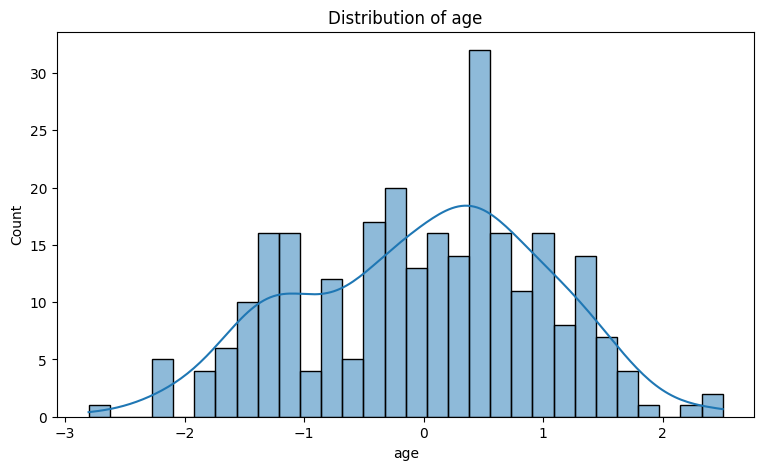

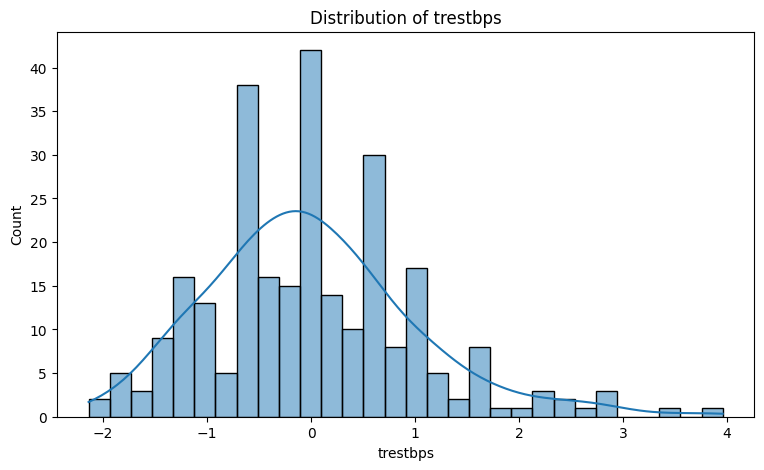

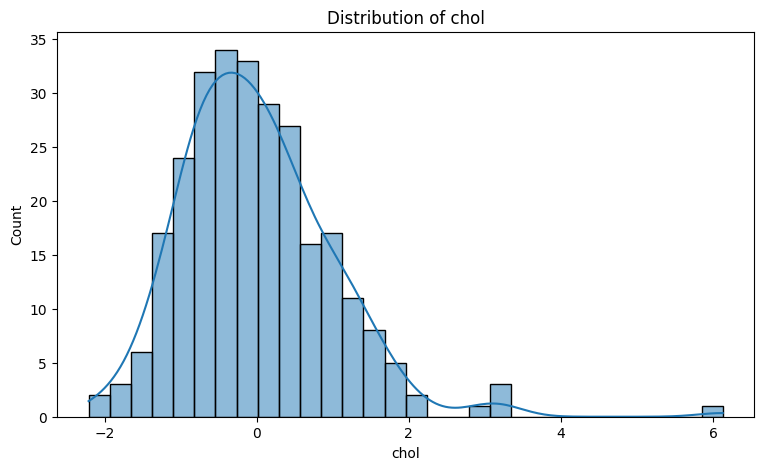

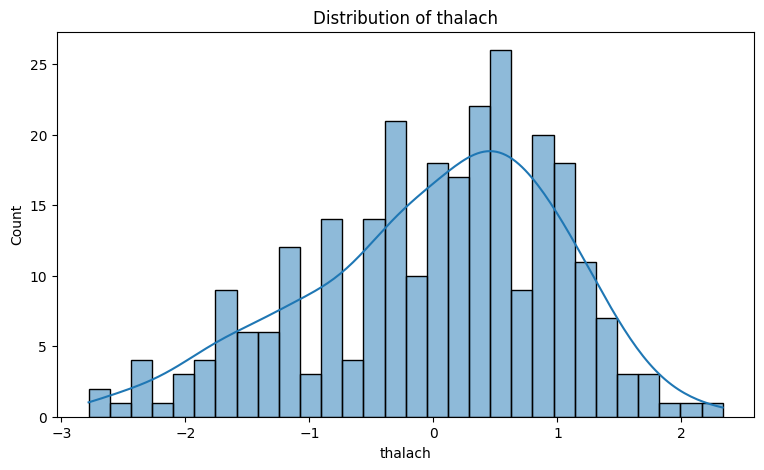

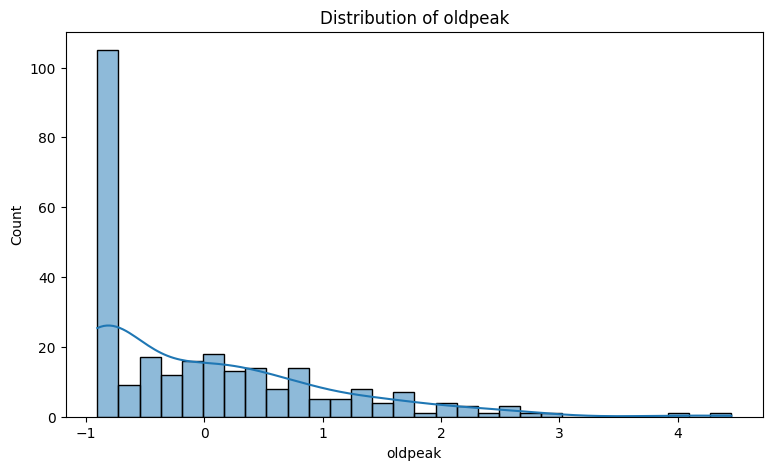

In [33]:
for column in pd.DataFrame(X_train[["age", "trestbps", "chol", "thalach", "oldpeak"]]).columns:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=pd.DataFrame(X_train), x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

## Model Training, Evaluating and Compare with DummyClassifier

In [34]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)

In [35]:
print("Dummy Classifier'ın Test Setindeki Doğruluğu:", dummy_clf.score(X_test, y_test))

Dummy Classifier'ın Test Setindeki Doğruluğu: 0.5483870967741935


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [37]:
classification_models = {"Decision Tree": DecisionTreeClassifier(),
                        "Random Forest": RandomForestClassifier(),
                        "Gradient Boosting": GradientBoostingClassifier(),
                        "Ada Boost": AdaBoostClassifier(),
                        "KNN": KNeighborsClassifier(),
                        "Logistic Regression": LogisticRegression(),
                        "Linear SVM": SVC(kernel = "linear"),
                        "RBF SVM": SVC(kernel = "rbf"),
                        "Polynomial SVM": SVC(kernel = "poly")}

In [38]:
model_names = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []

for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    train_score = clf.score(X_train, y_train)
    test_score = accuracy_score(y_test, predictions)
    score_precision = precision_score(y_test, predictions)
    score_recall = recall_score(y_test, predictions)
    score_f1 = f1_score(y_test, predictions)
    score_roc_auc = roc_auc_score(y_test, predictions)

    model_names.append(name)
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    precision.append(score_precision)
    recall.append(score_recall)
    f1.append(score_f1)
    roc_auc.append(score_roc_auc)

    print(f"{name} Train setindeki doğruluk: {train_score}")
    print(f"{name} Test setindeki doğruluk: {test_score}")
    print(f"{name} Precision (Hassasiyet): {score_precision}")
    print(f"{name} Recall (Duyarlılık): {score_recall}")
    print(f"{name} F1 Skoru: {score_f1}")
    print(f"{name} ROC-AUC Skoru: {score_roc_auc}\n")

Decision Tree Train setindeki doğruluk: 1.0
Decision Tree Test setindeki doğruluk: 0.8064516129032258
Decision Tree Precision (Hassasiyet): 0.8666666666666667
Decision Tree Recall (Duyarlılık): 0.7647058823529411
Decision Tree F1 Skoru: 0.8125
Decision Tree ROC-AUC Skoru: 0.8109243697478993

Random Forest Train setindeki doğruluk: 1.0
Random Forest Test setindeki doğruluk: 0.8387096774193549
Random Forest Precision (Hassasiyet): 0.875
Random Forest Recall (Duyarlılık): 0.8235294117647058
Random Forest F1 Skoru: 0.8484848484848485
Random Forest ROC-AUC Skoru: 0.8403361344537815

Gradient Boosting Train setindeki doğruluk: 0.996309963099631
Gradient Boosting Test setindeki doğruluk: 0.7419354838709677
Gradient Boosting Precision (Hassasiyet): 0.8
Gradient Boosting Recall (Duyarlılık): 0.7058823529411765
Gradient Boosting F1 Skoru: 0.75
Gradient Boosting ROC-AUC Skoru: 0.7457983193277311



c:\Users\ogulc\.conda\envs\PR\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Train setindeki doğruluk: 0.9298892988929889
Ada Boost Test setindeki doğruluk: 0.7741935483870968
Ada Boost Precision (Hassasiyet): 0.9166666666666666
Ada Boost Recall (Duyarlılık): 0.6470588235294118
Ada Boost F1 Skoru: 0.7586206896551724
Ada Boost ROC-AUC Skoru: 0.7878151260504201

KNN Train setindeki doğruluk: 0.8745387453874539
KNN Test setindeki doğruluk: 0.8387096774193549
KNN Precision (Hassasiyet): 0.9285714285714286
KNN Recall (Duyarlılık): 0.7647058823529411
KNN F1 Skoru: 0.8387096774193549
KNN ROC-AUC Skoru: 0.8466386554621849

Logistic Regression Train setindeki doğruluk: 0.8523985239852399
Logistic Regression Test setindeki doğruluk: 0.8387096774193549
Logistic Regression Precision (Hassasiyet): 0.9285714285714286
Logistic Regression Recall (Duyarlılık): 0.7647058823529411
Logistic Regression F1 Skoru: 0.8387096774193549
Logistic Regression ROC-AUC Skoru: 0.8466386554621849

Linear SVM Train setindeki doğruluk: 0.8597785977859779
Linear SVM Test setindeki doğrul

## Coding Again for Streamlit

### Selecting the Best Model 

**En iyi model:** 

+ Linear SVM Train setindeki doğruluk: 0.8597785977859779
+ Linear SVM Test setindeki doğruluk: 0.9032258064516129
+ Linear SVM Precision (Hassasiyet): 0.9375
+ Linear SVM Recall (Duyarlılık): 0.8823529411764706
+ Linear SVM F1 Skoru: 0.9090909090909091
+ Linear SVM ROC-AUC Skoru: 0.9054621848739496

sonuçları ile `Linear SVM` modeli gibi görünüyor. Bu projeyi Streamlit'te kullanabilmek için Linear SVM modelini baştan kuracağım 

In [41]:
from sklearn.svm import SVC
lr_svc = SVC(kernel = "linear").fit(X_train, y_train)
lr_svc

SVC(kernel='linear')